<a href="https://colab.research.google.com/github/riyashah29/MlExps/blob/main/5-randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name:Riya Shah    
Roll No.: D085  
SAP ID: 60009230017  
Branch: CSE DS-2-1

 Aim:Implement Random Forest algorithm on given datasets and compare the results with Decision Tree classifiers for the same datasets.

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
df1=pd.read_csv("/content/Iris.csv")
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df2=pd.read_csv("/content/placementdata.csv")
df2.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


#Decision tree

IRIS

In [ ]:
feature_cols = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = df1[feature_cols]
y = df1['Species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(X_train,y_train)

In [ ]:
y_pred = clf1.predict(X_test)

In [ ]:
print("Training Accuracy:",clf1.score(X_train, y_train))

Training Accuracy: 1.0


In [ ]:
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred))

Testing Accuracy: 1.0


PLACEMENT DATA

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [ ]:
extra_mapping = {'No': 0, 'Yes': 1}
df2['ExtracurricularActivities'] = df2['ExtracurricularActivities'].map(extra_mapping)

In [ ]:
placementtrain_mapping = {'No': 0, 'Yes': 1}
df2['PlacementTraining'] = df2['PlacementTraining'].map(placementtrain_mapping)

In [ ]:
feature_cols = ['CGPA','Internships','Projects','Workshops/Certifications','AptitudeTestScore','SoftSkillsRating','ExtracurricularActivities','PlacementTraining','SSC_Marks','HSC_Marks']
X2 = df2[feature_cols]
y2 = df2['PlacementStatus']

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [ ]:
clf12 = DecisionTreeClassifier()
clf12 = clf12.fit(X2_train,y2_train)

In [ ]:
y2_pred = clf12.predict(X2_test)

In [ ]:
print("Training Accuracy:",clf12.score(X2_train, y2_train))

Training Accuracy: 0.9991428571428571


In [ ]:
print("Testing Accuracy:",metrics.accuracy_score(y2_test, y2_pred))

Testing Accuracy: 0.7146666666666667


#Decision tree with feature importance

IRIS

In [ ]:
imp1=pd.Series(clf1.feature_importances_)
imp1

,0
0,0.000000
1,0.019110
2,0.423567
3,0.557323


In [ ]:
df1.drop(columns=['SepalLengthCm'],axis=1,inplace=True)

In [ ]:
X21 = df1.drop('Species', axis=1)
y21 = df1['Species']

In [ ]:
X21_train, X21_test, y21_train, y21_test = train_test_split(X21, y21, test_size=0.3, random_state=42)

In [ ]:
clf21 = DecisionTreeClassifier()
clf21 = clf21.fit(X21_train,y21_train)

In [ ]:
y21_pred = clf21.predict(X21_test)

In [ ]:
print("Training Accuracy:",clf21.score(X21_train, y21_train))

Training Accuracy: 1.0


In [ ]:
print("Testing Accuracy:",metrics.accuracy_score(y21_test, y21_pred))

Testing Accuracy: 1.0


PLACEMENT DATA

In [ ]:
imp12=pd.Series(clf12.feature_importances_)
imp12

,0
0,0.110165
1,0.027733
2,0.031212
3,0.040516
4,0.149812
5,0.086128
6,0.042496
7,0.022271
8,0.108759
9,0.380907


In [ ]:
df2.drop(columns=['ExtracurricularActivities','PlacementTraining'],axis=1,inplace=True)

In [ ]:
X22 = df2.drop('PlacementStatus', axis=1)
y22 = df2['PlacementStatus']

In [ ]:
X22_train, X22_test, y22_train, y22_test = train_test_split(X22, y22, test_size=0.3, random_state=42)

In [ ]:
clf22 = DecisionTreeClassifier()
clf22 = clf1.fit(X22_train,y22_train)

In [ ]:
y22_pred = clf22.predict(X22_test)

In [ ]:
print("Training Accuracy:",clf22.score(X22_train, y22_train))

Training Accuracy: 1.0


In [ ]:
print("Testing Accuracy:",metrics.accuracy_score(y22_test, y22_pred))

Testing Accuracy: 0.7106666666666667


#Random Forest w n estimation


In [ ]:
from sklearn.ensemble import RandomForestClassifier

IRIS

In [ ]:
df3=pd.read_csv("/content/Iris.csv")
df3.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
feature_cols = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X31 = df3[feature_cols]
y31 = df3['Species']

In [ ]:
X31_train, X31_test, y31_train, y31_test = train_test_split(X31, y31, test_size=0.3, random_state=42)

In [ ]:
clf31 = RandomForestClassifier(n_estimators=100)
clf31 = clf31.fit(X31_train,y31_train)

In [ ]:
y31_pred = clf31.predict(X31_test)

In [ ]:
print("Training Accuracy:",clf31.score(X31_train, y31_train))

Training Accuracy: 1.0


In [ ]:
print("Testing Accuracy:",metrics.accuracy_score(y31_test, y31_pred))

Testing Accuracy: 1.0


PLACEMENT DATA


In [ ]:
df4=pd.read_csv("/content/placementdata.csv")
df4.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [ ]:
extra_mapping = {'No': 0, 'Yes': 1}
df4['ExtracurricularActivities'] = df4['ExtracurricularActivities'].map(extra_mapping)

In [ ]:
placementtrain_mapping = {'No': 0, 'Yes': 1}
df4['PlacementTraining'] = df4['PlacementTraining'].map(placementtrain_mapping)

In [ ]:
X32 = df4.drop(['StudentID','PlacementStatus'], axis=1)
y32 = df4['PlacementStatus']

In [ ]:
X32_train, X32_test, y32_train, y32_test = train_test_split(X32, y32, test_size=0.3, random_state=42)

In [ ]:
clf32 = RandomForestClassifier(n_estimators=100)
clf32 = clf32.fit(X32_train,y32_train)

In [ ]:
y32_pred = clf32.predict(X32_test)

In [ ]:
print("Training Accuracy:",clf32.score(X32_train, y32_train))

Training Accuracy: 0.9991428571428571


In [ ]:
print("Testing Accuracy:",metrics.accuracy_score(y32_test, y32_pred))

Testing Accuracy: 0.778


#Random forest n estimators w feature importance

In [ ]:
imp3=pd.Series(clf31.feature_importances_)
imp3

,0
0,0.097521
1,0.036684
2,0.466567
3,0.399228


In [ ]:
df3.drop(columns=['SepalWidthCm'],axis=1,inplace=True)

In [ ]:
X41 = df1.drop('Species', axis=1)
y41 = df1['Species']

In [ ]:
X41_train, X41_test, y41_train, y41_test = train_test_split(X41, y41, test_size=0.3, random_state=42)

In [ ]:
clf41 = RandomForestClassifier(n_estimators=100)
clf41 = clf41.fit(X41_train,y41_train)

In [ ]:
y41_pred = clf41.predict(X41_test)

In [ ]:
print("Training Accuracy:",clf41.score(X41_train, y41_train))

Training Accuracy: 1.0


In [ ]:
print("Testing Accuracy:",metrics.accuracy_score(y41_test, y41_pred))

Testing Accuracy: 1.0


PLACEMENT DATA

In [ ]:
imp4=pd.Series(clf32.feature_importances_)
imp4

,0
0,0.113533
1,0.033594
2,0.092413
3,0.059657
4,0.165196
5,0.093808
6,0.065410
7,0.024921
8,0.133023
9,0.218444


In [ ]:
df4.drop(columns=['Internships','PlacementTraining'],axis=1,inplace=True)

In [ ]:
X42 = df4.drop('PlacementStatus', axis=1)
y42 = df4['PlacementStatus']

In [ ]:
X42_train, X42_test, y42_train, y42_test = train_test_split(X42, y42, test_size=0.3, random_state=42)

In [ ]:
clf42 = RandomForestClassifier(n_estimators=100)
clf42 = clf42.fit(X42_train,y42_train)

In [ ]:
y42_pred = clf42.predict(X42_test)

In [ ]:
print("Training Accuracy:",clf42.score(X42_train, y42_train))

Training Accuracy: 1.0


In [ ]:
print("Testing Accuracy:",metrics.accuracy_score(y42_test, y42_pred))

Testing Accuracy: 0.778


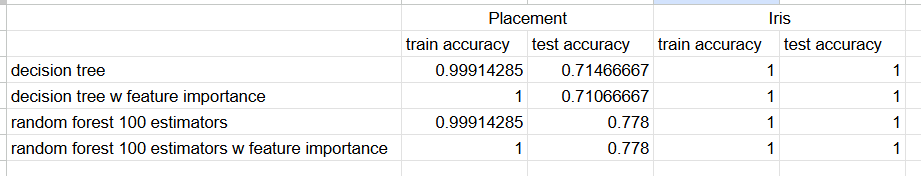